## Lab 5
Fourier transform and deconvolutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from skimage import data, color, img_as_float
from scipy.signal import convolve2d, deconvolve
from skimage.restoration import richardson_lucy as scipy_richardson_lucy

In [2]:

def plot_fourier_transform(signal, sample_rate):
    """
    Computes and plots the Fourier transform of a signal.
    
    Parameters:
        signal (ndarray): The input signal.
        sample_rate (int): The sampling rate of the signal.
    """
    N = len(signal)
    T = 1.0 / sample_rate
    yf = fft(signal)
    xf = fftfreq(N, T)[:N // 2]

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(signal)
    plt.title('Original Signal')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')

    plt.subplot(2, 1, 2)
    plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
    plt.title('Fourier Transform')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.tight_layout()
    plt.show()


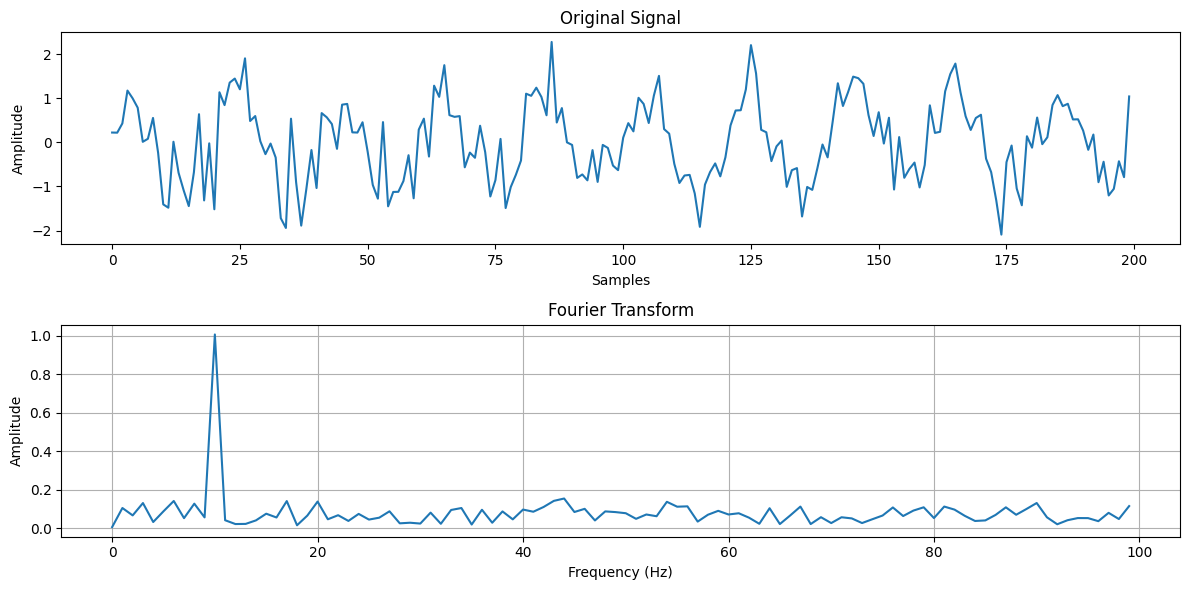

In [3]:
# Example Usage
sample_rate = 200  # Hz
t = np.linspace(0, 1, sample_rate, endpoint=False)
signal = np.sin(2 * np.pi * 10 * t) + 0.5 * np.random.normal(size=t.shape)

plot_fourier_transform(signal, sample_rate)

## Try different noise levels and frequencies

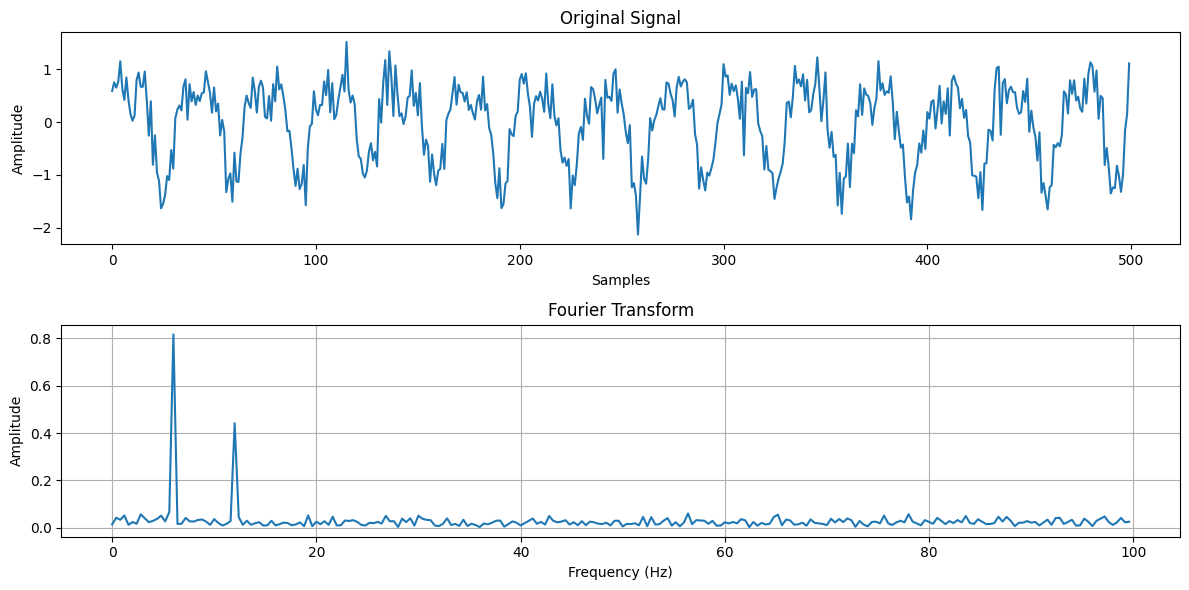

In [12]:
#### Try different values
signal = 0.8 * np.sin(2 * np.pi * 15 * t) + 0.4 * np.cos(2 * np.pi * 30 * t) + 0.3 * np.random.normal(size=t.shape)
plot_fourier_transform(signal, sample_rate)


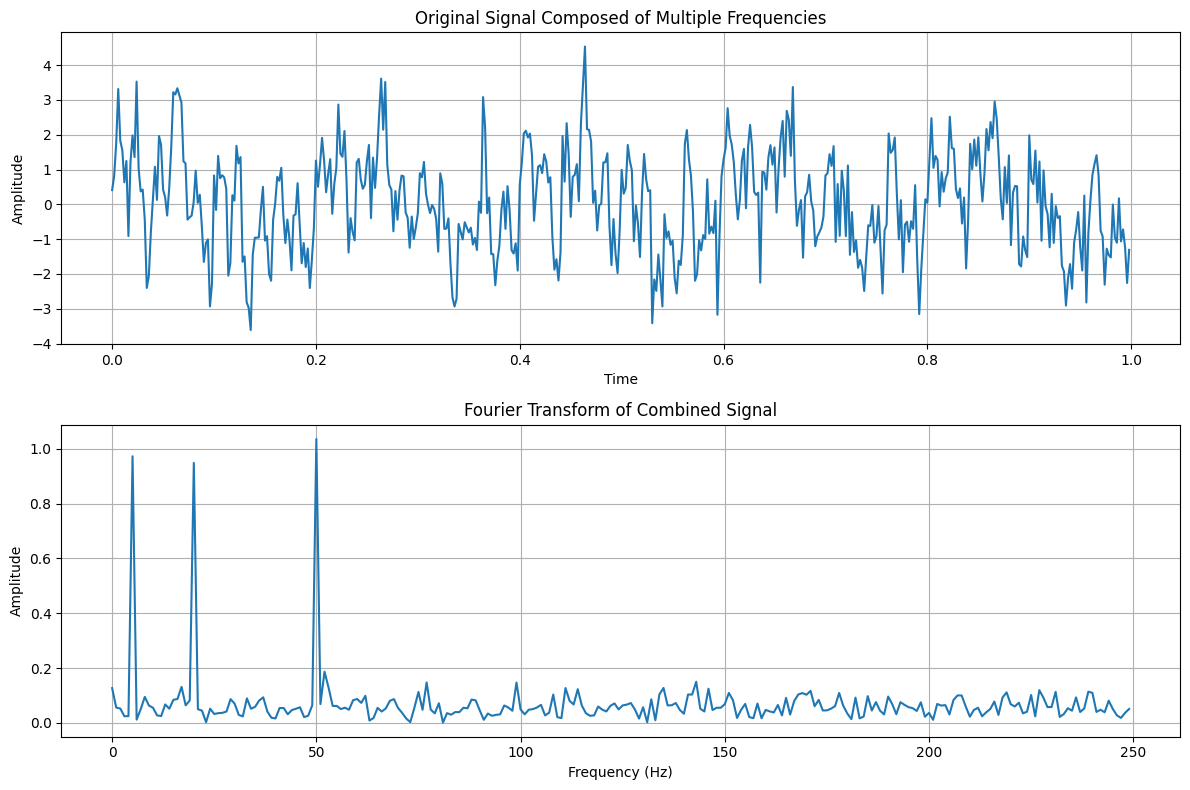

In [4]:
# Additional Example 1: Combining Multiple Frequency Components
# Description: Generate a signal composed of multiple sine waves at different frequencies and use the Fourier transform
# to identify the individual frequencies present in the signal.

t = np.linspace(0, 1, 500, endpoint=False)
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 20 * t) + np.sin(2 * np.pi * 50 * t) + 0.8 * np.random.normal(size=t.shape) # Signal with three sine waves of different frequencies

# Compute Fourier Transform
N = len(signal)
T = 1.0 / 500  # Sample rate
yf = fft(signal)
xf = fftfreq(N, T)[:N // 2]

# Plot original signal and frequency spectrum
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal Composed of Multiple Frequencies')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
plt.title('Fourier Transform of Combined Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()
plt.show()

## Multi component signal

In this case we have clean signal with multplie frequncies that the FFT is able to identify. 
We can use this information to remove any frequency we dont want and recover the signal

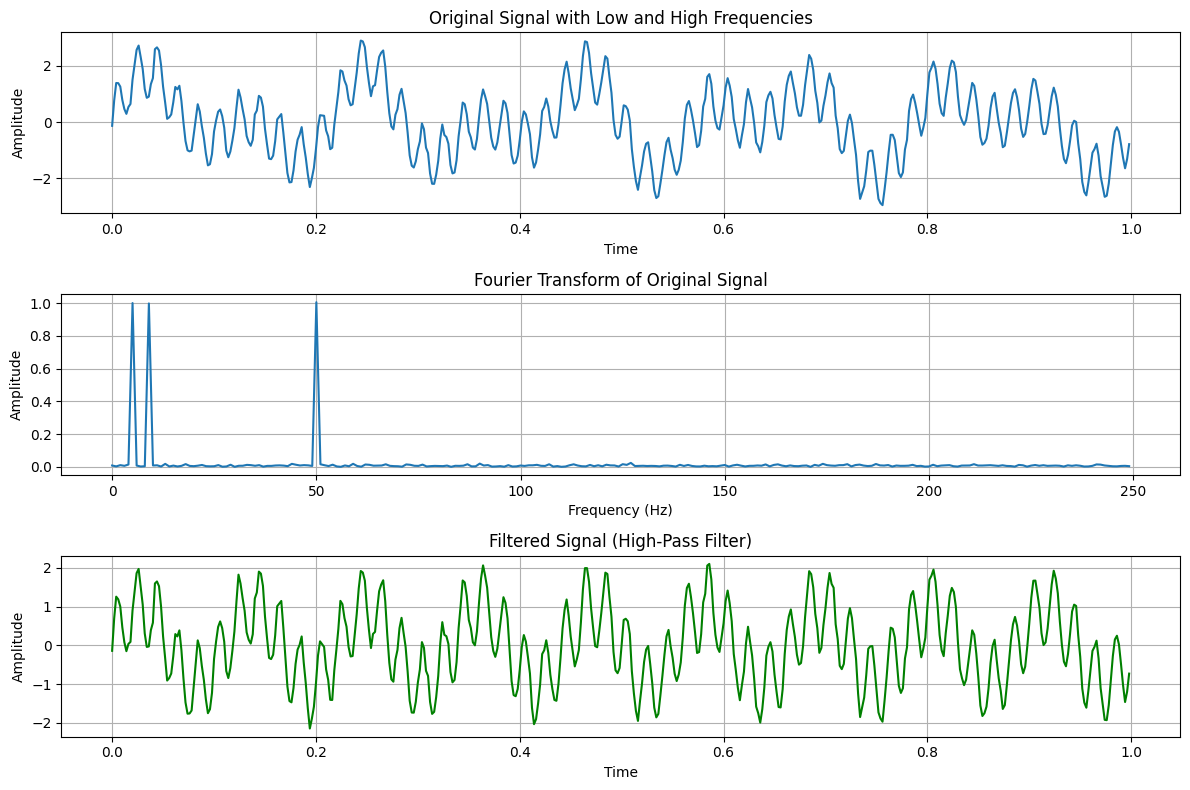

In [5]:

t = np.linspace(0, 1, 500, endpoint=False)
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 9 * t) + np.sin(2 * np.pi * 50 * t) + 0.1 * np.random.normal(size=t.shape)  # Signal with two sine waves of different frequencies

# Compute Fourier Transform
N = len(signal)
T = 1.0 / 500  # Sample rate
yf = fft(signal)
xf = fftfreq(N, T)

# Apply high-pass filter (remove frequencies below a threshold)
cutoff_frequency = 7 ## --> you can experiment with this value
yf_filtered = yf.copy()
yf_filtered[np.abs(xf) < cutoff_frequency] = 0

# Compute Inverse Fourier Transform to get filtered signal
filtered_signal = ifft(yf_filtered)

# Plot original and filtered signals
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal with Low and High Frequencies')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yf[:N // 2]))
plt.title('Fourier Transform of Original Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal.real, color='green')
plt.title('Filtered Signal (High-Pass Filter)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()


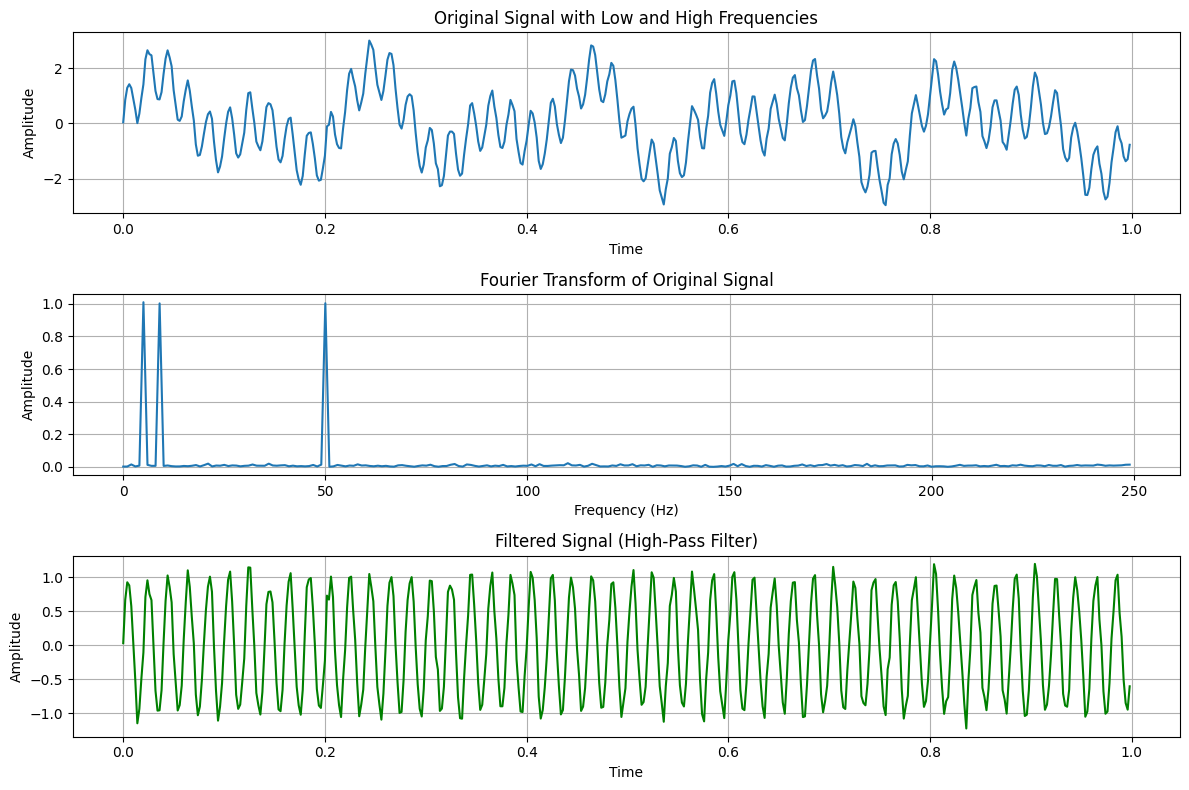

In [11]:
## Try different frequencies, noise level and frequency filters

t = np.linspace(0, 1, 500, endpoint=False)
signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 9 * t) + np.sin(2 * np.pi * 50 * t) + 0.1 * np.random.normal(size=t.shape)  # Signal with two sine waves of different frequencies

# Compute Fourier Transform
N = len(signal)
T = 1.0 / 500  # Sample rate
yf = fft(signal)
xf = fftfreq(N, T)

# Apply high-pass filter (remove frequencies below a threshold)
cutoff_frequency = 10 ## --> you can experiment with this value
yf_filtered = yf.copy()
yf_filtered[np.abs(xf) < cutoff_frequency] = 0

# Compute Inverse Fourier Transform to get filtered signal
filtered_signal = ifft(yf_filtered)

# Plot original and filtered signals
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal with Low and High Frequencies')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(xf[:N // 2], 2.0 / N * np.abs(yf[:N // 2]))
plt.title('Fourier Transform of Original Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal.real, color='green')
plt.title('Filtered Signal (High-Pass Filter)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()


## FFT on images

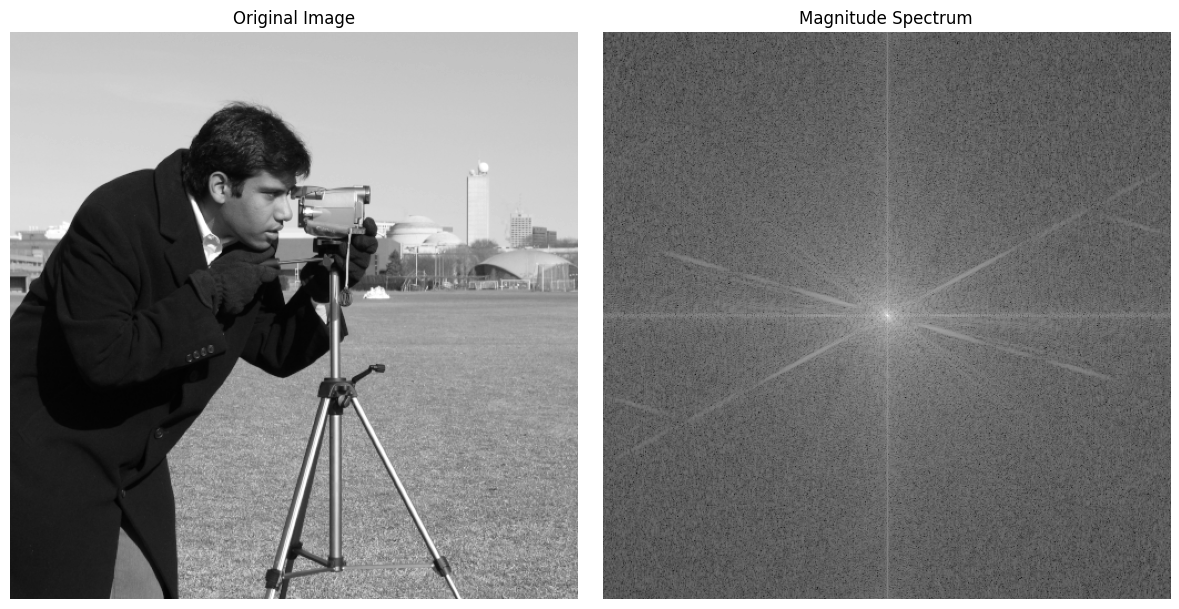

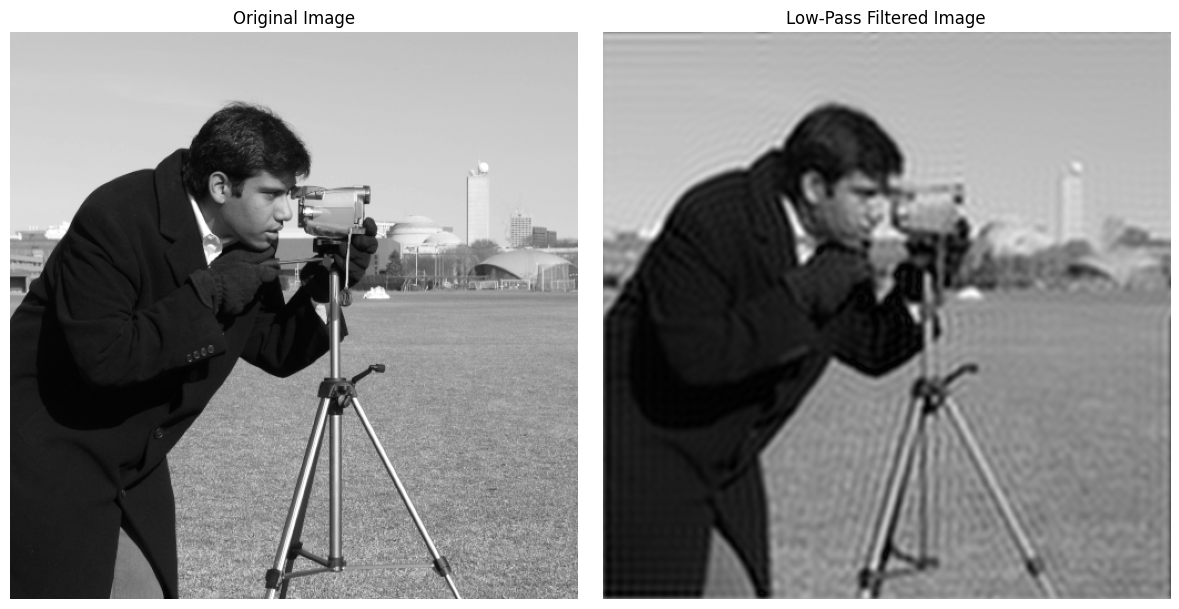

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from numpy.fft import fft2, fftshift, ifft2

# Load the image (already grayscale)
image = data.camera()

# Apply 2D Fourier Transform
image_fft = fft2(image)
image_fft_shifted = fftshift(image_fft)  # Shift zero frequency to center

# Compute the magnitude spectrum
magnitude_spectrum = np.log1p(np.abs(image_fft_shifted))

# Plot the original image and its Fourier magnitude spectrum
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()

# Optional: Apply a low-pass filter to remove high frequencies
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), np.uint8)
r = 50  # Radius of the low-pass filter
mask[crow - r:crow + r, ccol - r:ccol + r] = 1

# Apply the mask and inverse Fourier Transform to get the filtered image
filtered_fft_shifted = image_fft_shifted * mask
filtered_fft = np.fft.ifftshift(filtered_fft_shifted)
filtered_image = np.abs(ifft2(filtered_fft))

# Plot the filtered image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Low-Pass Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()


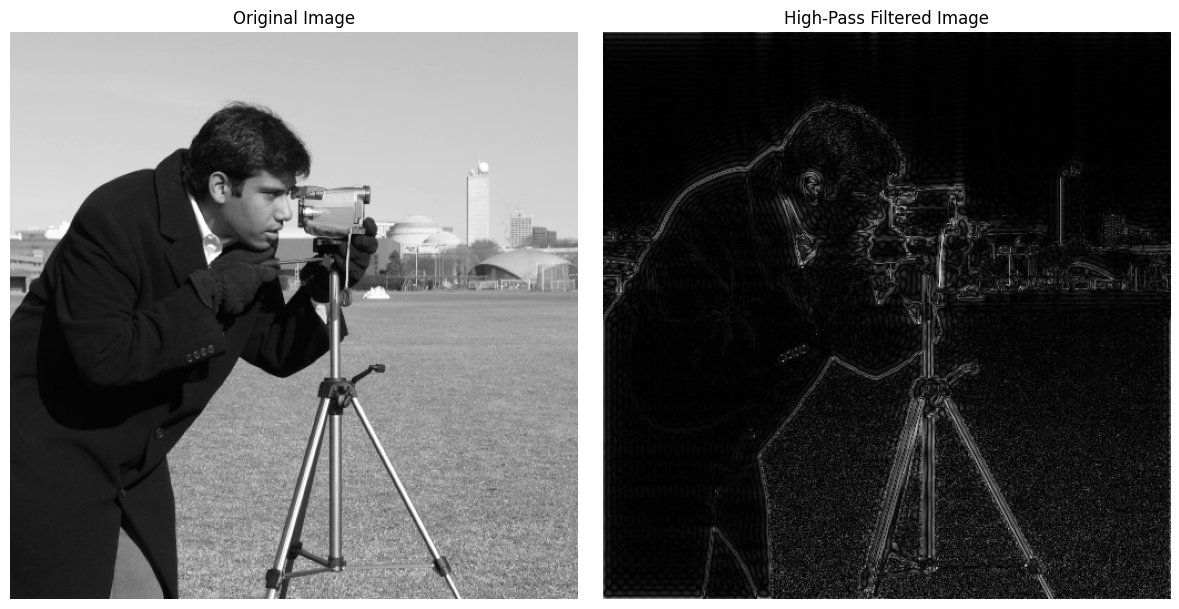

In [7]:
# Apply a high-pass filter to remove low frequencies
# Create a high-pass mask that keeps only the high frequencies
mask_high_pass = np.ones((rows, cols), np.uint8)
mask_high_pass[crow - r:crow + r, ccol - r:ccol + r] = 0

# Apply the high-pass mask and inverse Fourier Transform to get the filtered image
filtered_fft_shifted_high_pass = image_fft_shifted * mask_high_pass
filtered_fft_high_pass = np.fft.ifftshift(filtered_fft_shifted_high_pass)
filtered_image_high_pass = np.abs(ifft2(filtered_fft_high_pass))

# Plot the high-pass filtered image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_high_pass, cmap='gray')
plt.title('High-Pass Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Deconvolution
This example uses the RL deconvolution from scipy

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from skimage import data, color, img_as_float
from scipy.signal import convolve2d, deconvolve
from skimage.restoration import richardson_lucy as scipy_richardson_lucy

def gaussian_filter_2d(size=5, sigma=1.0):
    """Generates a 2D Gaussian filter."""
    # Create a grid of (x, y) coordinates
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)

    # Compute the Gaussian function
    gaussian = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))

    # Normalize the filter so that the sum is 1
    return gaussian / np.sum(gaussian)




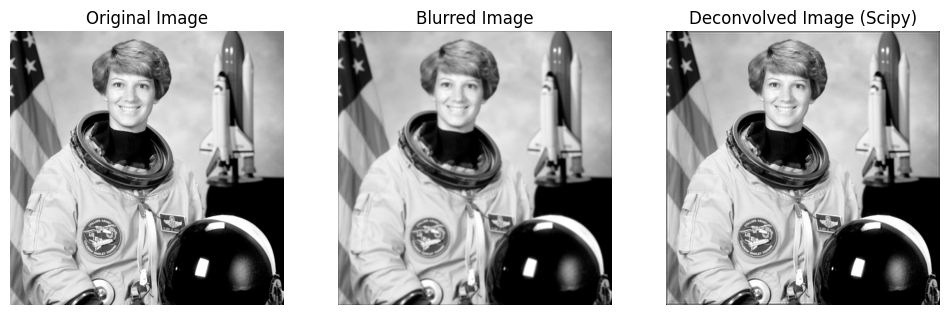

In [9]:
# Example Usage
# Create a 5x5 Gaussian filter with sigma = 1.0

gaussian_filter = gaussian_filter_2d(size=5, sigma=1.0)
astro = img_as_float(data.astronaut())
psf = gaussian_filter # np.ones((5, 5)) / 25  # Example PSF (mean filter)
blurred = convolve2d(astro[:, :, 0], psf, mode='same')

deconvolved_image = scipy_richardson_lucy(blurred, psf, num_iter=60)

# Display results
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(astro[:, :, 0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(deconvolved_image, cmap='gray')
plt.title('Deconvolved Image (Scipy)')
plt.axis('off')

plt.show()


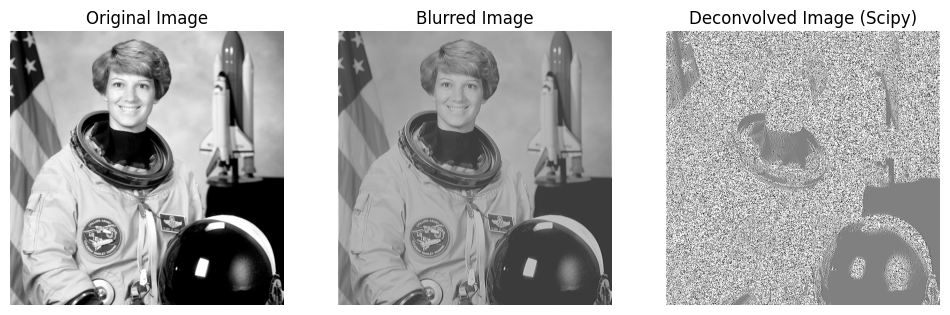

In [10]:
## Try different psf values
# Example Usage
# Create a 5x5 Gaussian filter with sigma = 1.0

gaussian_filter = gaussian_filter_2d(size=5, sigma=1.0)
astro = img_as_float(data.astronaut())

psf = np.array([[0, 0, 0], [-1, 4, -1], [0, 0, 0]])

blurred = convolve2d(astro[:, :, 0], psf, mode='same')

deconvolved_image = scipy_richardson_lucy(blurred, psf, num_iter=60)

# Display results
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(astro[:, :, 0], cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(deconvolved_image, cmap='gray')
plt.title('Deconvolved Image (Scipy)')
plt.axis('off')

plt.show()
